In [ ]:
11:21 bilby INFO    : Sampling time: 3 days, 17:03:13.558173
11:21 bilby INFO    : Summary of results:
nsamples: 4143
ln_noise_evidence: -348768.637
ln_evidence: -347919.736 +/-  0.166
ln_bayes_factor: 848.901 +/-  0.166

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import corner
import bilby

In [3]:
result = bilby.result.read_in_result("YunesEccentric3harmonics20Hz_k_0_data0_1187008882-43_analysis_H1L1V1_result.hdf5")

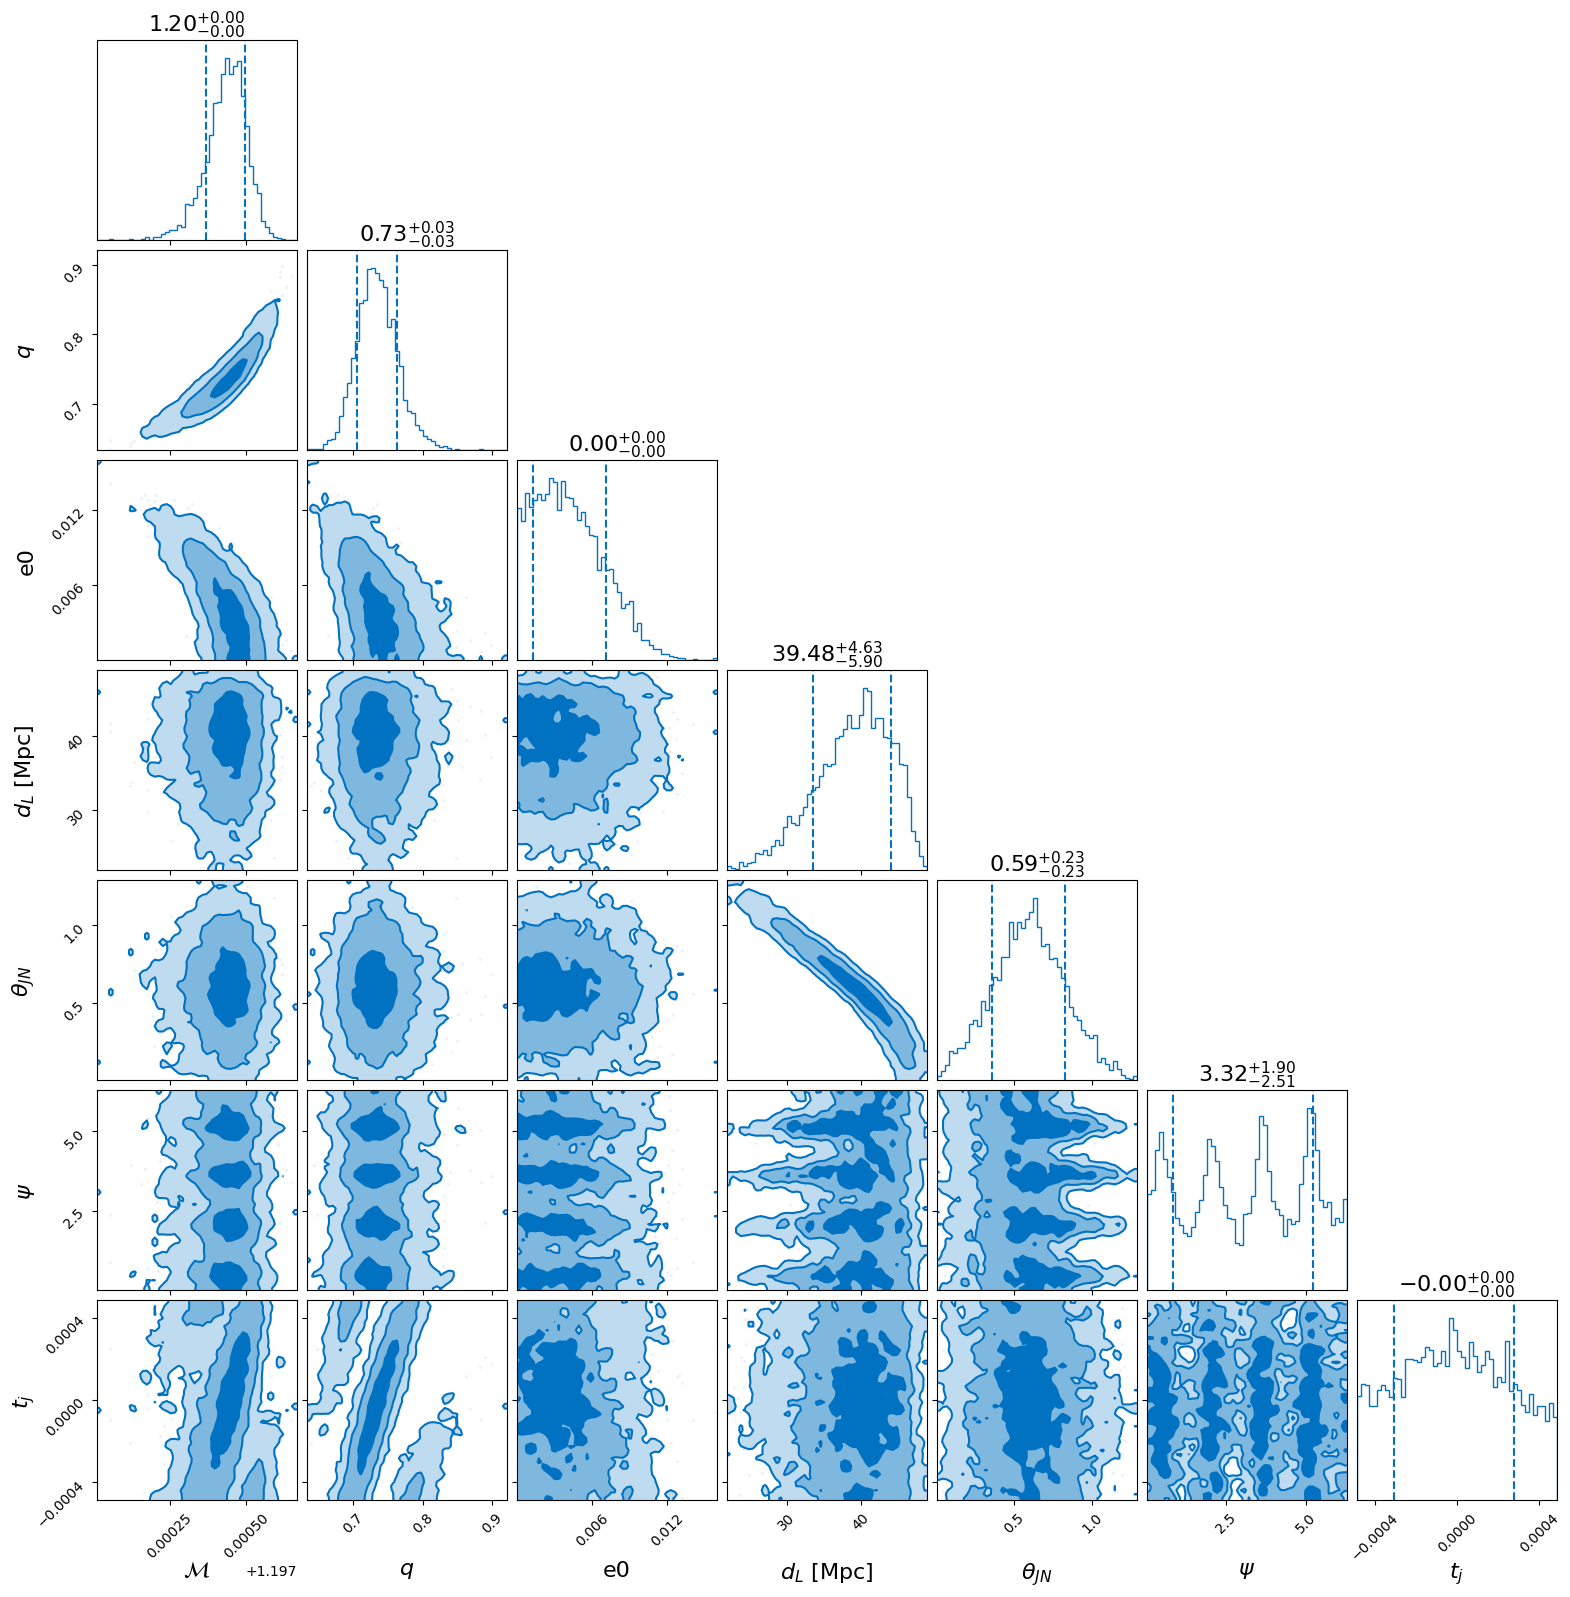

In [4]:
result.plot_corner(outdir='.')

In [5]:
result.log_10_bayes_factor

368.67295890659983

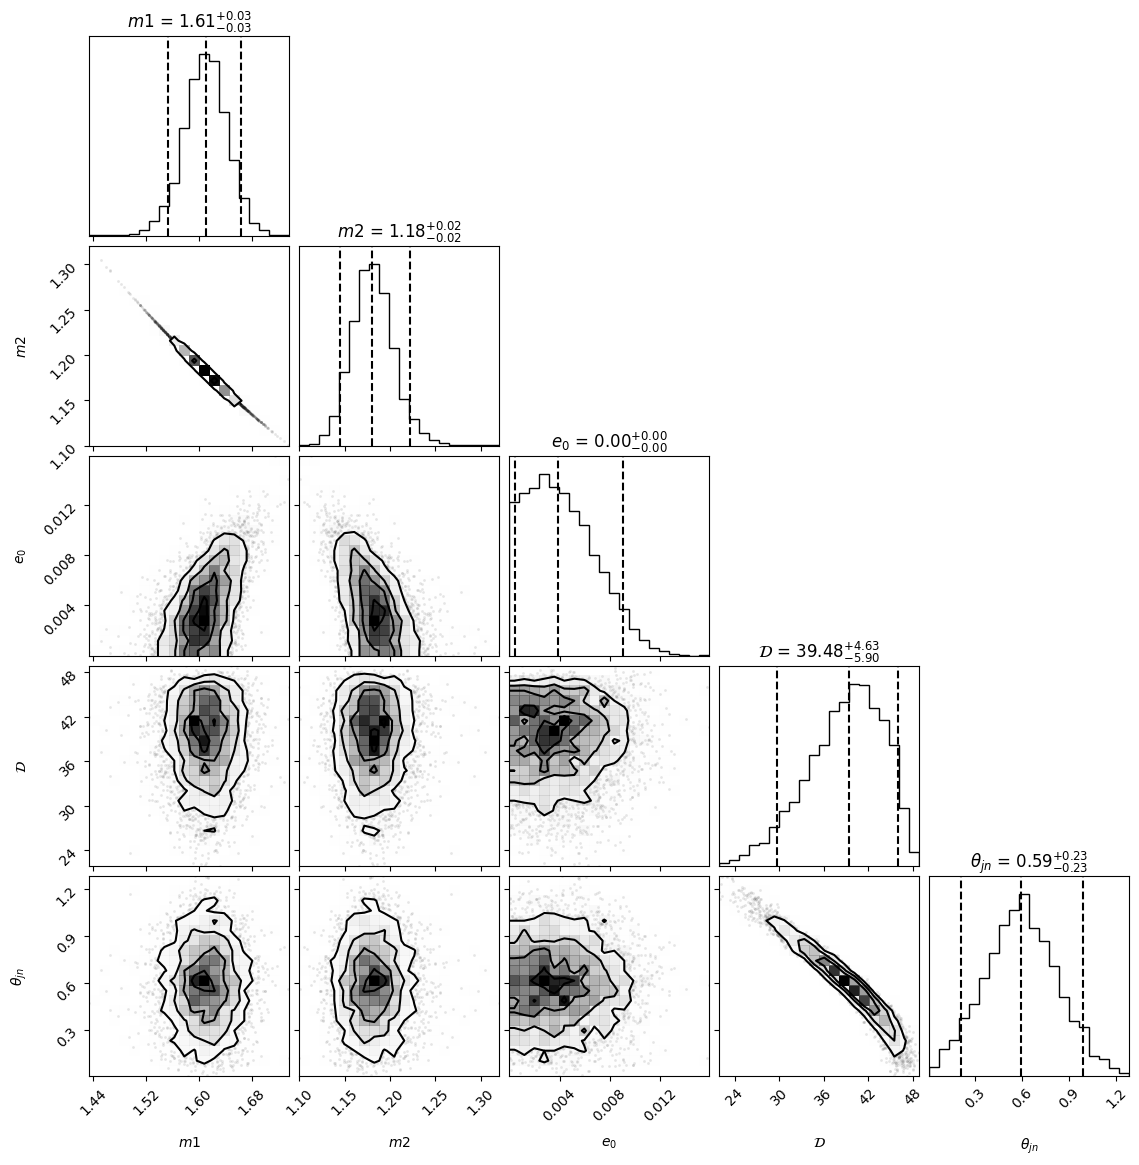

In [6]:
# TaylorF2Ecc
## minimum-frequency = 20Hz
chirp_mass_ = result.posterior["chirp_mass"].values
mass_ratio_ =  result.posterior["mass_ratio"].values
theta_jn = result.posterior["theta_jn"].values
e0 = result.posterior["eccentricity"].values
D = result.posterior["luminosity_distance"].values

m1 = (chirp_mass_*(1+mass_ratio_)**(1/5))/mass_ratio_**(3/5)
m2 = chirp_mass_*mass_ratio_**(2/5)*(1+mass_ratio_)**(1/5)

data = np.transpose(np.array([m1, m2,e0,D,theta_jn]))
figure = corner.corner(data, labels=[r"$m1$", r"$m2$", r"$e_0$", r"$\mathcal{D}$", r"$\theta_{jn}$"],
                       quantiles=[0.05, 0.5, 0.95],
                       show_titles=True, title_kwargs={"fontsize": 12})

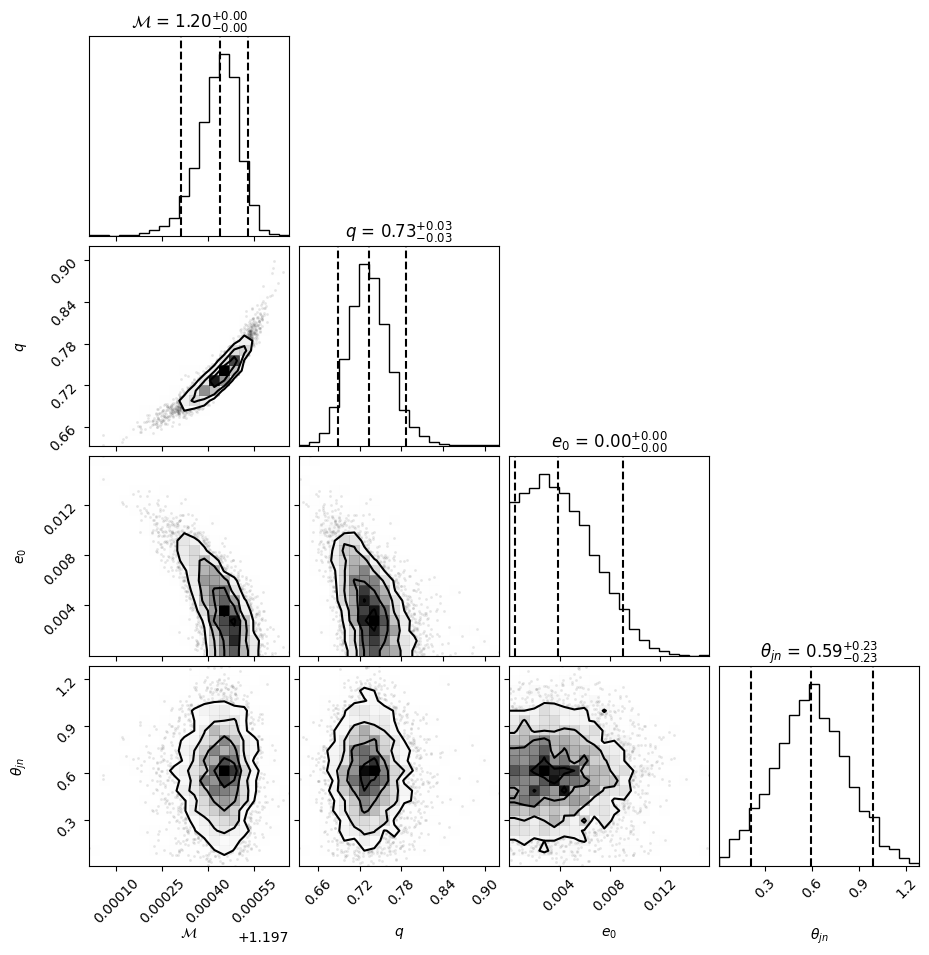

In [7]:
# TaylorF2Ecc
## minimum-frequency = 20Hz
data = np.transpose(np.array([chirp_mass_,mass_ratio_,e0,theta_jn]))
figure = corner.corner(data, labels=[r"$\mathcal{M}$", r"$q$", r"$e_0$", r"$\theta_{jn}$"],
                       quantiles=[0.05, 0.5, 0.95],
                       show_titles=True, title_kwargs={"fontsize": 12})